In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit

In [7]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [8]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0);

In [51]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

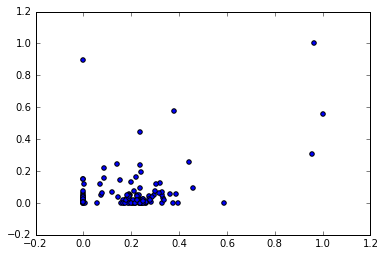

In [52]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
%matplotlib inline
f=np.asarray(finance_features)
f=scaler.fit_transform(f)

finance_features=f
plt.scatter( f[:,0],f[:,1], )
plt.show()

In [57]:
nd=scaler.fit(data[:,1:])
print nd.data_max_[0],nd.data_min_[0]
print minmaxscale(200000.0,nd.data_min_[0],nd.data_max_[0])
print minmaxscale(1000000.0,nd.data_min_[1],nd.data_max_[1])

1111258.0 0.0
0.179976207145
0.0291134511597


In [55]:
def minmaxscale(v,mins,maxs):
    return (v-mins)/(maxs-mins)

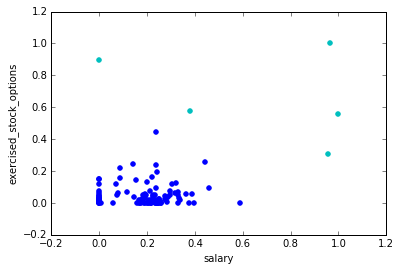

In [49]:
from sklearn.cluster import KMeans
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
kmeans = KMeans(n_clusters=2)
kmeans.fit(finance_features)
pred=kmeans.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [ ]:
print ("%2.1f" %m[0][2])

In [ ]:
fet=1
mins=100000000000000000000000
maxs=0
for d in data_dict.keys():
    if str(data_dict[d][features_list[fet]])!='NaN':
        if data_dict[d][features_list[fet]]<mins:
            mins=data_dict[d][features_list[fet]]
        if data_dict[d][features_list[fet]]>maxs:
            maxs=data_dict[d][features_list[fet]]
print maxs,mins

In [85]:
features_list[3]

'total_payments'

In [50]:
def featureScaling(arr):
    import numpy as np
    mins=np.asarray(data).min()
    maxs=np.asarray(data).max()
    return  (arr-mins)*1.0/(maxs-mins)
   

# tests of your feature scaler--line below is input data
datas = [115, 140, 175]
print featureScaling(data)

[ 0.          0.41666667  1.        ]


In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
arr=np.asarray(data,'float32').reshape(-1,1)
scaler.fit_transform(arr)


array([[ 0.        ],
       [ 0.41666675],
       [ 1.        ]], dtype=float32)